In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
superconductivty_data = fetch_ucirepo(id=464) 

# data (as pandas dataframes)
X = superconductivty_data.data.features
y = superconductivty_data.data.targets

# metadata
print(superconductivty_data.metadata)

# variable information
print(superconductivty_data.variables)

{'uci_id': 464, 'name': 'Superconductivty Data', 'repository_url': 'https://archive.ics.uci.edu/dataset/464/superconductivty+data', 'data_url': 'https://archive.ics.uci.edu/static/public/464/data.csv', 'abstract': 'Two file s contain data on 21263 superconductors and their relevant features.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 21263, 'num_features': 81, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['critical_temp'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C53P47', 'creators': ['Kam Hamidieh'], 'intro_paper': {'ID': 452, 'type': 'NATIVE', 'title': 'A data-driven statistical model for predicting the critical temperature of a superconductor', 'authors': 'K. Hamidieh', 'venue': 'Computational materials science', 'year': 2018, 'journal': None, 'DOI': None, 'URL': 'http

In [2]:
df = X.join(y)

df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


<Axes: xlabel='wtd_std_ThermalConductivity', ylabel='critical_temp'>

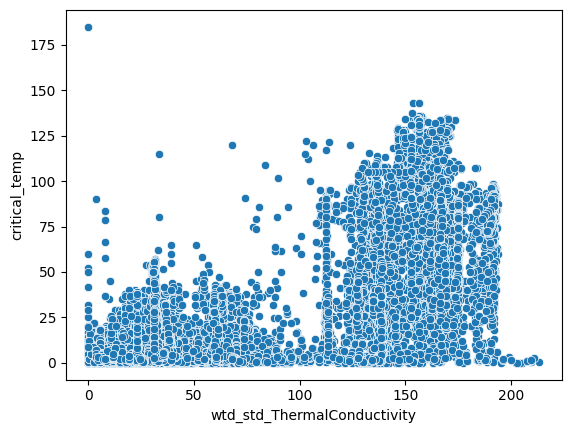

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df, x = 'wtd_std_ThermalConductivity', y = 'critical_temp')

In [5]:
df[df['critical_temp']>175]

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
20573,2,16.53647,11.360293,5.685033,3.193745,0.136394,0.224622,31.05706,10.016373,15.52853,...,2.666667,2.44949,1.817121,0.410116,0.562335,5,1.333333,2.5,2.357023,185.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(max_depth=24, n_estimators=75, max_features=0.75, min_samples_leaf=4)
cross_val_score(model, X, y)

In [5]:
import numpy as np

np.average([0.71328291, 0.70798805, 0.87548418, 0.80132904, 0.64739096])

np.float64(0.749095028)

In [11]:
model = RandomForestRegressor(max_depth=24, n_estimators=75, max_features=0.75, min_samples_leaf=4)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5)

model.fit(X_train, y_train)
model.predict(X_test)

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([ 3.17186691, 43.0468835 , 18.65978936,  1.52024457, 27.63364098])

In [12]:
y_test

,critical_temp
20943,2.480
9971,52.900
15164,19.800
15625,0.907
18519,13.000
